# Task

Modify the scratch code of K-means clustering in our lecture:
- Modify so it print out the total within-cluster variation.  Then try to run several k and identify which k is best.
- Since k-means can be slow due to its pairwise computations, let's implement a mini-batch k-means in which the cluster is create using only partial subset of samples.
- Put everything into a class


**Note form solution**

Mini-Batch will rarely converge, thus it is important to add a max_iteration or some tolerance.  Last, theoretically speaking, Mini-Batch will never perform better in terms of accuracy when compare to K-means, but it is very close to optimal but will almost always beat K-means in terms of time given large dataset and a modest tolerance parameter.

In [14]:
#Implement K-means from scratch
from sklearn.datasets import make_blobs
from sklearn.metrics import pairwise_distances_argmin
from time import time
import numpy as np
import matplotlib.pyplot as plt

In [37]:
X, y_true = make_blobs(n_samples=1500, centers=4,
                       cluster_std=0.60, random_state=0)

class minibatch_KMeans:
    def __init__(self, n_clusters, replacement=True, batch_size=100, max_iter=100):
        self.n_clusters = n_clusters
        self.replacement = replacement
        self.batch_size = batch_size
        self.max_iter = max_iter 
        
    def fit(self, X):
        m, n = X.shape

        #1. randomly choose n clusters from X
        #you can also randomly generate any two points
        rng = np.random.RandomState(42)
        i = rng.permutation(m)[:self.n_clusters]
        self.centers = X[i]

        
        #having max iter makes sure it will stop eventually
        #mini-batch
        for ix in np.arange(self.max_iter):
            random = rng.randint(m)
            X_batch = X[random:random+self.batch_size]

            #2. assign lables based on closest center
            #return the index of centers having smallest
            #distance with X
            labels = pairwise_distances_argmin(X_batch, self.centers)
    
            #3. find new centers
            new_centers = []
            for i in range(self.n_clusters):
                new_centers.append(X_batch[labels == i].mean(axis=0))

            #convert list to np.array; you can actually combine #3
            #with np.array in one sentence 
            new_centers = np.array(new_centers)
        
            #plotting purpose
            #plot every 5th iteration to save space
            #remove this if, if you want to see each snapshot
            if (ix % 5 == 0):
                pred = pairwise_distances_argmin(X, new_centers)
                plt.figure(figsize=(5, 2))
                plt.title(f"N_clusters: {self.n_clusters}")
                plt.scatter(X[:, 0], X[:, 1], c=pred)
                plt.scatter(new_centers[:, 0], new_centers[:, 1], s=100, c="black", alpha=0.6)

            #4 stopping criteria - if centers do not 
            #change anymore, we stop!
            #make sure to add rtol or atol since mini-batch does not converge
            if(np.allclose(self.centers, new_centers, rtol=0.2)):
                break
            else:
                self.centers = new_centers
                
        print(f"Done in {ix} iterations")
    
        #compute total within-variation score
        total_with_variation_score = 0
        labels = pairwise_distances_argmin(X, self.centers) #<---Note I use X here.
        for i in range(self.n_clusters):
            cluster_mean = X[labels==i].mean(axis=0)
            total_with_variation_score += ((X[labels==i] - cluster_mean)** 2).sum()
            
        print("Total with variation score: ", total_with_variation_score)
        
        
    def predict(self,X):
        return pairwise_distances_argmin(X, self.centers)
        
    

=====k = 2
Done in 3 iterations
Total with variation score:  5806.265978253411
Fit and predict time 0.03121471405029297
=====k = 3
Done in 3 iterations
Total with variation score:  3175.0215055926315
Fit and predict time 0.0300443172454834
=====k = 4
Done in 3 iterations
Total with variation score:  3060.973639538683
Fit and predict time 0.03002333641052246
=====k = 5
Done in 1 iterations
Total with variation score:  932.2183241238286
Fit and predict time 0.029926061630249023
=====k = 6
Done in 1 iterations
Total with variation score:  874.8641756746689
Fit and predict time 0.034712791442871094


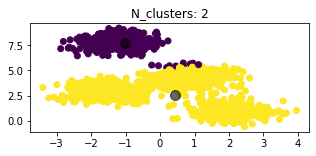

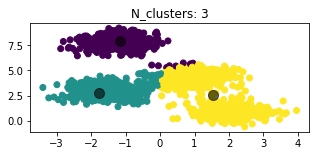

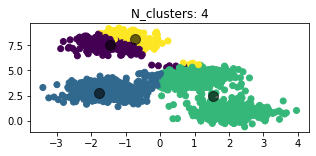

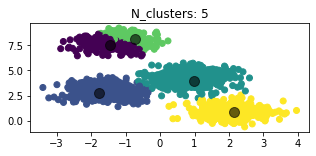

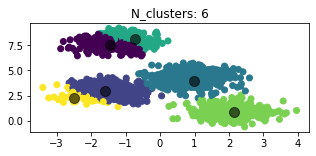

In [38]:
#main code

for k in range(2, 7):
    print(f"=====k = {k}")
    start = time()
    model = minibatch_KMeans(k)
    model.fit(X)
    preds = model.predict(X)
    print(f"Fit and predict time {time() - start}")